<a href="https://colab.research.google.com/github/rdbhatkal/Sales_Prediction/blob/main/Sales_prediction_pt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Prediction Cleaning the Data Set

In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import all libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl

In [38]:
# reading the csv file from the drive 
filename = '/content/drive/MyDrive/coding dojo/CodingDojo/02 Week 2_ Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

In [39]:
#creating a copy of the dataset for machine learning pre processing
df_ml = df.copy()

In [ ]:
# Looking at first 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Using Pandas to start cleaning and exploring the data

In [ ]:
#The shape of the data set 
df.shape

(8523, 12)

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

No duplicate values so we keep exploring

In [ ]:
#Understanding the datatypes of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# change the data type of Outlet_Establishmnet_Year to string

df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(str)

In [ ]:
#Recheck the datatypes of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Checking the number of unique values 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#Checking for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see Item_Weight and Outlet_Size has significant missing values so they cannot be dropped.

## Analyzing the Null Values 

1) Lets look at Outlet_Size first

In [ ]:
# Looking at Outlet Size 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since Outlet_Size is a categorical column, we can fill the missing cells with ‘Unknown’

In [ ]:
df['Outlet_Size'].fillna(value='Unknown',inplace=True)


In [ ]:
# Lets check to see if the null values have been replaced
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see above, Outlet_Size no longer has null values

2) Now lets look at null values in the Item_Weight column 

In [ ]:
# Looking at Item Weight
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
# Looking at Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Let us assume that products that belong to a certain "Item_Type" group are similar in weight 

We will replace the null values in the Item_Weight column with the mean weight of product who belong to the same Item_Type category 

Code Source: https://stackoverflow.com/questions/53338898/pandas-dataframe-replace-nan-values-with-average-of-a-certain-group


In [ ]:
df['Item_Weight'] = df.Item_Weight.fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))                                                                                                                                                          


In [ ]:
# Lets check to see if the null values have been replaced
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since there are no more null values in our data set, we will continue with our exploration of the data

## Let us now take a closer look at all the Categorical data columns

1) Item_Fat_Content column

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can see above, we have some inconsistency in category names and should be fixed

In [ ]:
# Replacing 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
# Replacing 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Replacing 'regular' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
# Lets look at the value count once again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

We now have only two unique values for Item_Fat_Content, so we can continue with our exploration

2) Item_Type column

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

As we can see above, we only have unique categories so we can continue with our exploration

3) Outlet _Size column

In [ ]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

4) Outlet_Location_Type column

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

5) Outlet_Type column

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

# Now let us take a deeper dive into our numerical columns and obtain a summary statistic of each column 

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,2181.288914
std,4.232804,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.867061,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Using Pandas to do statistical analysis and help understand and explain our dataset 

## Let us start by looking at our Numerical Variables

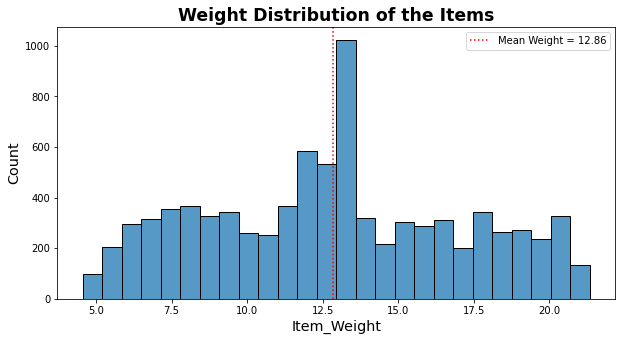

In [ ]:
#Let us plot the Item_Weight column to understand the weight distribustion of the items
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Weight', ax=ax)
ax.set_title('Weight Distribution of the Items',
             fontsize='xx-large',
             fontweight='semibold');
## Annotate mean 
mean_weight = df['Item_Weight'].mean()
ax.axvline(mean_weight, color='red', ls=':', 
           label=f'Mean Weight = {round(mean_weight, 2)}');

## Increasing Axis Label Font Sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')
ax.legend();


From the above histogram, we can see that, most of the items have weight in range of 10-16. 

The Mean weight of the Items is 12.86



Source:
https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec 


No handles with labels found to put in legend.


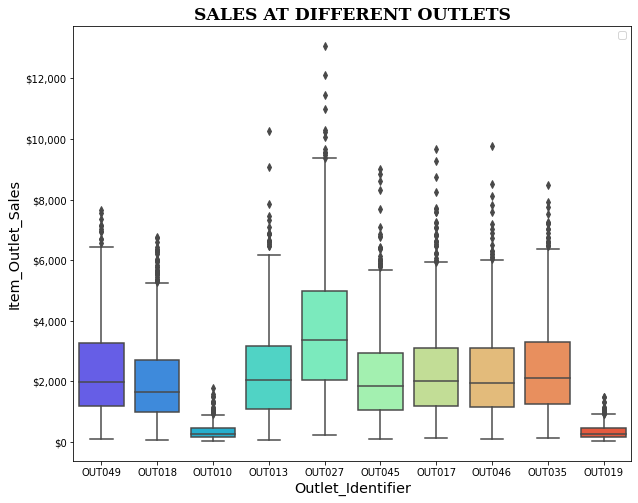

In [ ]:
##Use boxplot to understand the Items Outlet Sales at each outlet 

fig, ax = plt.subplots(figsize=(10,8))
## Plot boxplot
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df, palette='rainbow')
ax.set_title('SALES AT DIFFERENT OUTLETS', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
## Increasing Axis Label Font Sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(price_fmt)
# ax.xaxis.label()
ax.legend();

This box plot shows us how each Outlet is performing with respect to its sales. We can see that outlet OUT027 is performing great in terms of Item_Outlet_Sales while OUT010 and OUT019 are performing poorly

### Let us look to see what kind of relationships we have amoung our numerical variables 

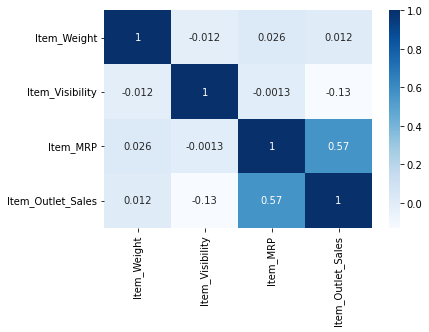

In [ ]:
#Understanding correlations amoung our numeric variables
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues',annot = True);

From the above graph we can see that there is a moderate positive correlation between 
Item_MRP and Item_Outlet_Sales 

Since we will be predicting the Item_Outlet_Sales; it is good to know there is a positive correlation between Item_MRP and Item_Outlet_Sales 

## Let us now look at our some of our Categorical Variables

Source:
https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

Let us look at overall sales at outlets by Location Type

In [ ]:
#Using group by to see overall sales by Outlet Location Type
SalesBy_TierType = df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()
SalesBy_TierType

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

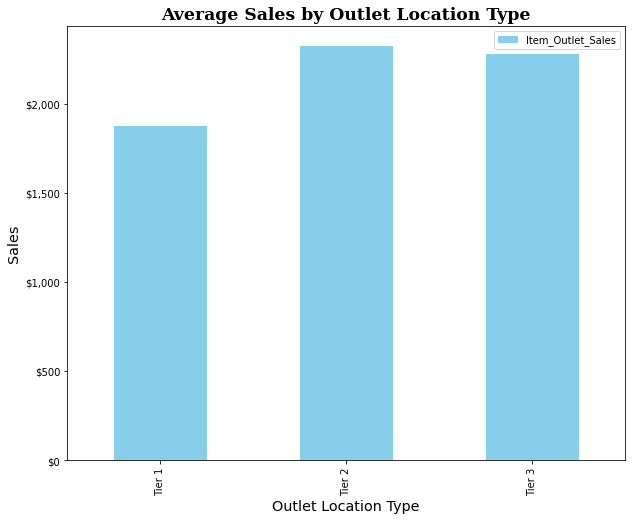

In [ ]:
#Lets plot the above result
fig, ax = plt.subplots(figsize=(10,8))
SalesBy_TierType.plot(kind="bar", color = 'skyblue');
ax.set_title('Average Sales by Outlet Location Type', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
             
## Increasing Axis Label Font Sizes
ax.set_xlabel('Outlet Location Type',
              fontsize='x-large')
ax.set_ylabel("Sales",
              fontsize='x-large')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(price_fmt)
# ax.xaxis.label()
ax.legend();

We see that Tier 2 stores has the highest average Sales while Tier 1 has the lowest average sale, we will now try to understand what kind of outlets do these locations have

In [ ]:
# Lets see what type of outlets exist in each tier and their sales contribution
SalesBy_OutletType = df.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].mean()
SalesBy_OutletType

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         340.329723
                      Supermarket Type1    2313.099451
Tier 2                Supermarket Type1    2323.990559
Tier 3                Grocery Store         339.351662
                      Supermarket Type1    2298.995256
                      Supermarket Type2    1995.498739
                      Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

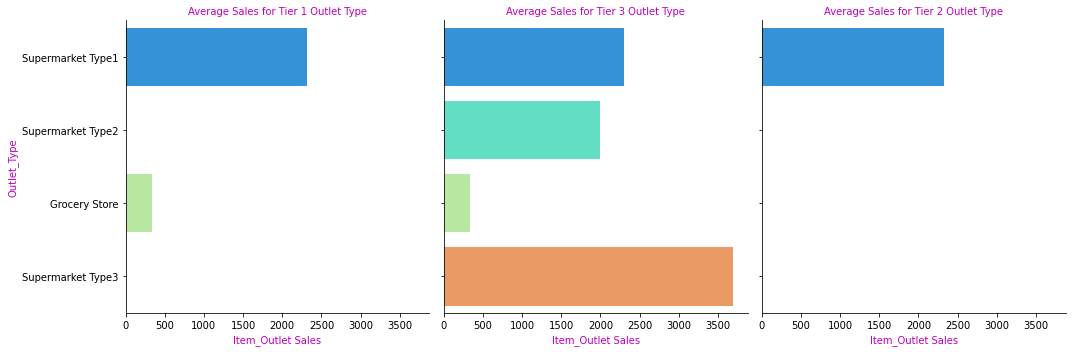

In [ ]:
##Lets plot the above result
g = sns.catplot( x='Item_Outlet_Sales',y ='Outlet_Type', col = 'Outlet_Location_Type', ci = None, data=df, kind='bar',  palette='rainbow')
g.set_axis_labels("Item_Outlet Sales", "Outlet_Type", c= 'm')
g.set_titles("Average Sales for {col_name} Outlet Type", c= 'm');



We see that Supermarket type 3 is doing the best which contributes to the overall sales in Tier 3. 

Supermarket Type 2 & 3 only exists in Tier 3 

Supermarket Type 1 is the only type that exists in all 3 Tiers and contribute similar sales value to their Tiers 

Grocery Store exists in Tier 1 and Tier 3


Source:
https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot


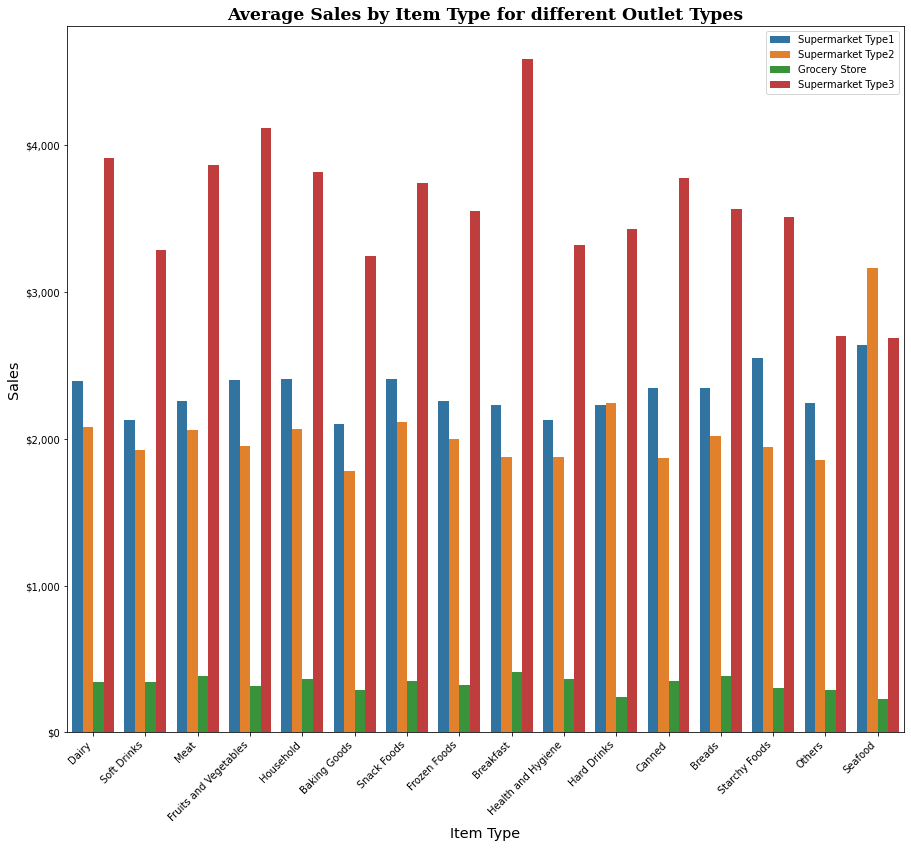

In [ ]:
# Let us now look at Sales by Item Type at different Outlets
fig, ax = plt.subplots(figsize=(15, 13))
sns.barplot( x='Item_Type', y = 'Item_Outlet_Sales', ci = None, hue = 'Outlet_Type' ,  data=df )
ax.set_title('Average Sales by Item Type for different Outlet Types', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
             
## Increasing Axis Label Font Sizes
ax.set_xlabel('Item Type',
              fontsize='x-large')
ax.set_ylabel("Sales",
              fontsize='x-large')
## rotating labels
labels = ax.get_xticklabels()
plt.setp(labels, 
         rotation=45, 
         horizontalalignment='right')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(price_fmt)
# ax.xaxis.label()
ax.legend();

The above vizualization shows us the Sales of items by its Item_Type

In Supermarket Type 1 Seafood and Starchy Food have highest sales 

In Supermarket Type 2 Seafood and Hard Drinks have highest sales 

Grocery Stores Breakfast and Meat item types have the hieghest sales

In Supermarket Type 3 Breakfast and Fruits and Vegetables have highest sales

Source: 
https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot/68334380#68334380

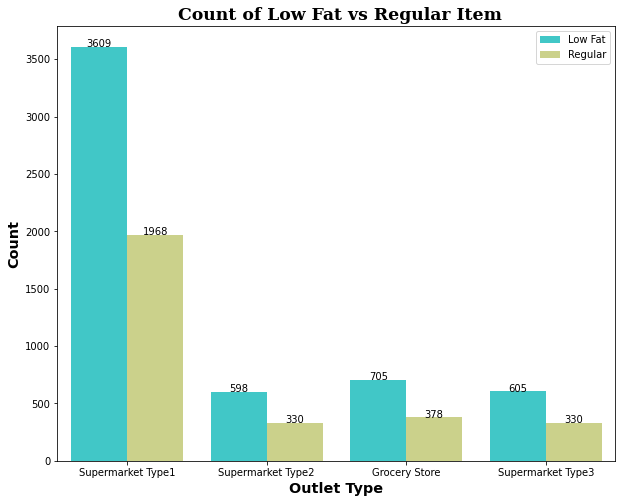

In [ ]:
##Lets look at Item_Fat_Content by Outlet Type

fig, ax = plt.subplots(figsize=(10, 8))
graph =sns.countplot( x ='Outlet_Type',  data=df, hue = 'Item_Fat_Content' , palette='rainbow'); 


ax.set_title(' Count of Low Fat vs Regular Item', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');

## Lets get the 

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");

## Increasing Axis Label Font Sizes
ax.set_xlabel('Outlet Type',
              fontsize='x-large', fontweight='semibold')
ax.set_ylabel("Count",
              fontsize='x-large', fontweight='semibold')

# ax.xaxis.label()
ax.legend();

We can see that all the outlets sell more Low Fat Items than Regular Items

In [ ]:
#Lets look at Average Sales by Item Type
SalesBy_ItemType = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean()
SalesBy_ItemType

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

Let us look at the over all Top 3 Item Types (ie. Baking Goods, Breads & Breakfast)and see if their Item_MRP vary by Outlet Type

In [ ]:
#Creating a new filter with Breakfast, Baking Goods and Bread Items only 

filter1 = ((df['Item_Type']=='Breakfast') | (df['Item_Type']== 'Baking Goods') | (df['Item_Type']=='Breads')) 
Top3 = df.loc[filter1, :]
Top3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
15,FDP49,9.000000,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
17,FDP49,9.000000,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982
21,FDW12,12.277108,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.277108,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876


Source: https://datavizpyr.com/show-mean-mark-on-boxplot-using-seaborn-in-python/


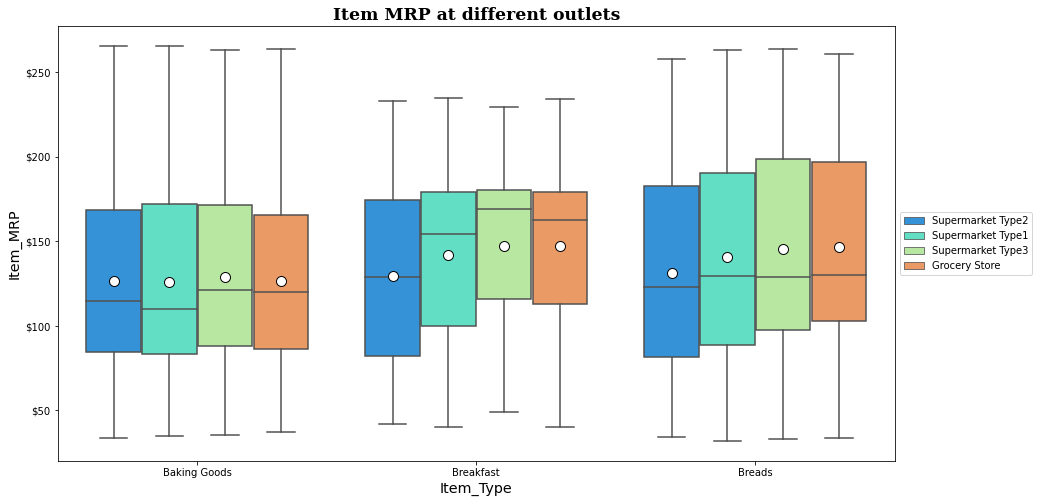

In [ ]:
##Use boxplot to understand the Items MRP at each outlet type

fig, ax = plt.subplots(figsize=(15,8))
## Plot boxplot
sns.boxplot( x='Item_Type',  y ='Item_MRP' ,hue= 'Outlet_Type',  data=Top3,  palette='rainbow', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

ax.set_title('Item MRP at different outlets', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
## Increasing Axis Label Font Sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(price_fmt)
# ax.xaxis.label()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

From  the above visualization, we can see that,
For Baking Goods:

1.   For Baking Goods:
*   The median price is the almost the same for Supermarket Type2, Supermaket Type 3 and Grocey Store
*   The median price for Supermarket Type 1 is slightly lower than 
*   The mean price for Baking Goods across the different outlets is almost the same
*   The mean price is higher than the median price for all outlet Types
2.   For Breakfast Items:

*   The median Breakfast item price Supermarket Type2 is much lower than the other outlets
*   The median Breakfast item price for Supermarket Type 3 is higher than all other outlet types 
*   Supermarket Type 2 has the lowest mean price for Breakfast items while Supermarket Type3, Supermaket Type 1 and Grocey Store have similar mean price

3.   For Bread Items:

*   The median price for Bread across the different outlets is almost the same
*   The mean Bread price for Supermarket Type 3 and Grocery store are similar and is higher than all other outlet types


# Machine Learning

In [40]:
# Importing ML libraries

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

### We will be using the copy if the original dataframe 

In [41]:
# Looking at first 5 rows of the dataframe
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking for duplicates and missing values

In [42]:
# Checking for duplicate values
df_ml.duplicated().sum()

0

No duplicate values so we keep exploring

In [43]:
#Understanding the datatypes of each column
df_ml.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
# change the data type of Outlet_Establishmnet_Year to string so we can use the year for analysis 

df_ml['Outlet_Establishment_Year'] = df_ml['Outlet_Establishment_Year'].astype(str)

In [45]:
#Recheck the datatypes of each column
df_ml.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [46]:
#Checking for null values
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see Item_Weight and Outlet_Size has significant missing values so they cannot be dropped.

## Let us take a closer look at all the Categorical data columns

In [47]:
for col in df_ml.select_dtypes(include='object').columns:
  display(df_ml[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Lets clean some on the columns before splitting

1) Item_Fat_Content column

In [48]:
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can see above, we have some inconsistency in category names and should be fixed before training the data 

In [49]:
# Replacing 'LF' with 'Low Fat'
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF', 'Low Fat')
# Replacing 'low fat' with 'Low Fat'
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Replacing 'regular' with 'Regular'
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg', 'Regular')

In [50]:
# Lets look at the value count once again
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Splitting the Dataset

We drop columns 'Item_Identifier' and 'Outlet_Identifier' as they dont provide much information

In [34]:
# Define features (X) and target (y)
X = df_ml.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'], axis=1)
y = df_ml['Item_Outlet_Sales']

In [35]:
# Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Understanding the feature data types :

**We will scale the numeric columns:**
Item_Weight, Item_Visibility, Item_MRP 


**We will encode NominalFeatures with the OneHotEncoder:**
Item_Fat_Content, Item_Type, Outlet_Type

**We will encode the Ordinal Feature with the OrdinalEncoder:**
Outlet_Size, Outlet_Location_Type, Outlet_Establishment_Year



# Instantiate Transformers

In [21]:
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Ordinal Encoder

Ordinal encoder needs a list of ordered labels to know how to encode each ordinal category.

In [52]:
Outlet_Size_labels = ['Small','Medium','High']
Outlet_Location_Type_labels = ['Tier 1', 'Tier 2','Tier 3']
Outlet_Establishment_Year_labels = ['1985', '1987','1997','1998','1999','2002','2004','2007','2009']
#ordered_labels = [Outlet_Size_labels]
ordered_labels = [Outlet_Size_labels, Outlet_Location_Type_labels,Outlet_Establishment_Year_labels]

ordinal = OrdinalEncoder(categories=ordered_labels)

# Create a Pipeline for Numeric, Ordinal and Nominal Data,

In [53]:
# Numeric pipeline
number_pipe = make_pipeline(mean_imputer, scaler)

# Ordinal pipeline
ordinal_pipe = make_pipeline(most_frequent_imputer, ordinal)

# Nominal pipeline
nominal_pipe = make_pipeline(constant_imputer, ohe)

# Creating Columns Selectors

In [54]:
#We will use lists of column names for the ordinal and nominal columns instead of selectors.
num_selector = make_column_selector(dtype_include='number')
nom_cols = ['Item_Fat_Content','Item_Type','Outlet_Type']
ord_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']


# Creating Tuples 

In [ ]:
# Creating Tuples for Column Transformer
number_tuple = (number_pipe, num_selector)
nominal_tuple = (nominal_pipe, nom_cols)
ordinal_tuple = (ordinal_pipe, ord_cols)

Create Column Transformer to Apply Different Preprocessing to Different Columns

In [55]:
# ColumnTransformer
preprocessor = make_column_transformer(ordinal_tuple,nominal_tuple,number_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['1985',
                                                                              '1987',
                                                                              '1997',
                                                                              '1998',
                                                                              '1999',
                                                                              '2002',
                                                                              '2004',
                                                                              '2007',
                                                                              '2009']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Outlet_Establishme...
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70d0fb3a50>)])

Fit the Column Transformer on the Training Data

In [56]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['1985',
                                                                              '1987',
                                                                              '1997',
                                                                              '1998',
                                                                              '1999',
                                                                              '2002',
                                                                              '2004',
                                                                              '2007',
                                                                              '2009']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Outlet_Establishme...
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70d0fb3a50>)])

In [57]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [58]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64




array([[ 1.        ,  2.        ,  8.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [ 1.        ,  2.        ,  8.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [ 1.        ,  0.        ,  4.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 1.        ,  1.        ,  5.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 1.        ,  1.        ,  7.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 0.        ,  0.        ,  2.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])